In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)

/home/huydn/miniconda3/envs/torch/lib/python3.11/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


## Load Data

In [2]:
data_path = "data/NonLinear_data.npy"
data = np.load(data_path, allow_pickle=True).item()
X, labels = data["X"], data["labels"].astype(int)
# X, labels = torch.tensor(X, dtype=torch.float32), torch.tensor(labels, dtype=torch.long)
X, labels = torch.tensor(X, dtype=torch.float32), torch.tensor(labels)

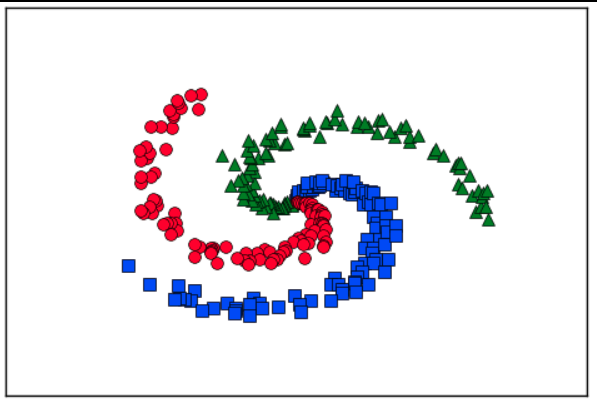

In [3]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        # print(idx)
        return self.X[idx], self.y[idx]

In [4]:
train_dataset = CustomDataset(X, labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

## Use Pytorch to build, compile and train and evaluate the model
The results of training and evaluation are presented graphically using matplotlib

### MLP - relu

In [5]:
# Thiết kế model theo yêu cầu đề  bài 
# Hidden layer 1: Linear layer in_features = input_dims (2), out_features = hidden_dims (128),  
# activation = relu
# Output layer: Linear layer in_features = hidden_dims (128), out_features = output_dims (3), 
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dims, hidden_dims)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dims, output_dims)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x.squeeze(1)

model = MLP(input_dims=2, hidden_dims=128, output_dims=3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [6]:
num_epochs = 500
train_losses = []
train_acc = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    accuracy = 0
    cnt = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        accuracy += (torch.argmax(outputs, 1) == y).sum().item()
        cnt += len(y)
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    accuracy /= cnt
    train_acc.append(accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {train_loss:.4f},  Train_Acc: {accuracy:.4f}")

Epoch 1/500, Train_Loss: 1.0046,  Train_Acc: 0.4967
Epoch 2/500, Train_Loss: 0.8844,  Train_Acc: 0.5433
Epoch 3/500, Train_Loss: 0.8256,  Train_Acc: 0.5767
Epoch 4/500, Train_Loss: 0.7872,  Train_Acc: 0.5467
Epoch 5/500, Train_Loss: 0.7652,  Train_Acc: 0.5467
Epoch 6/500, Train_Loss: 0.7519,  Train_Acc: 0.5433
Epoch 7/500, Train_Loss: 0.7434,  Train_Acc: 0.5467
Epoch 8/500, Train_Loss: 0.7412,  Train_Acc: 0.5600
Epoch 9/500, Train_Loss: 0.7449,  Train_Acc: 0.5767
Epoch 10/500, Train_Loss: 0.7341,  Train_Acc: 0.5767
Epoch 11/500, Train_Loss: 0.7457,  Train_Acc: 0.5633
Epoch 12/500, Train_Loss: 0.6956,  Train_Acc: 0.5700
Epoch 13/500, Train_Loss: 0.7165,  Train_Acc: 0.5533
Epoch 14/500, Train_Loss: 0.7034,  Train_Acc: 0.5633
Epoch 15/500, Train_Loss: 0.6965,  Train_Acc: 0.5700
Epoch 16/500, Train_Loss: 0.7091,  Train_Acc: 0.5767
Epoch 17/500, Train_Loss: 0.7062,  Train_Acc: 0.5633
Epoch 18/500, Train_Loss: 0.6927,  Train_Acc: 0.5700
Epoch 19/500, Train_Loss: 0.6868,  Train_Acc: 0.5833
Ep

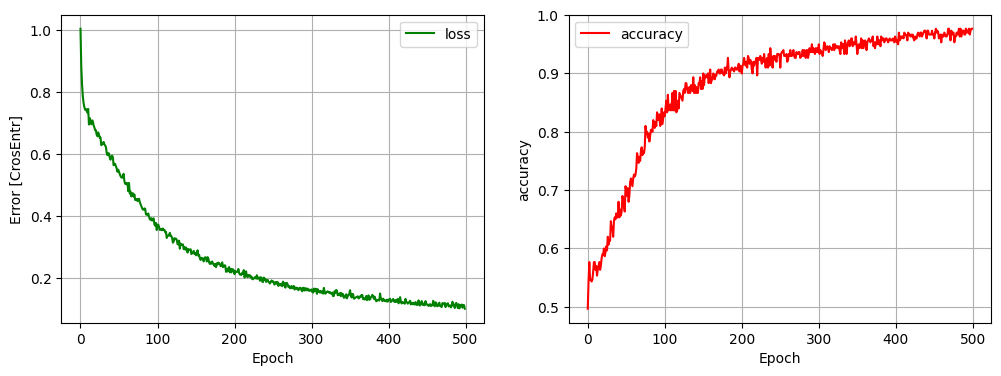

In [7]:

fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

